# **Credit Card Data**
- Binary Classification problem using Logistic Regression(Classifying if the customer will default the loan or not)
- **About the dataset:**
    - The dataset contains 6 columns
    - **clientid** - unique id of each client
    - **income** - monthly income of the client
    - **age**
    - **loan** - amount of loan
    - **LTI** - loan to income ratio
    - **default** - target variable

In [22]:
# importing the required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# reading the dataset
data=pd.read_csv('/content/credit_data.csv')
data.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


In [5]:
data.describe() # descriptive statistics

,clientid,income,age,loan,LTI,default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,577.494589,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,1.000000,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,500.750000,32796.459717,29.062492,1939.708847,0.047903,0.000000
50%,1000.500000,45789.117313,41.382673,3974.719419,0.099437,0.000000
75%,1500.250000,57791.281668,52.596993,6432.410625,0.147585,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,0.199938,1.000000


In [6]:
data.info() # data type details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       2000 non-null   float64
 3   loan      2000 non-null   float64
 4   LTI       2000 non-null   float64
 5   default   2000 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 93.9 KB


In [8]:
data.columns #fetching the columns

Index(['clientid', 'income', 'age', 'loan', 'LTI', 'default'], dtype='object')

In [7]:
# checking for missing values
data.isnull().sum()

clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64

<Axes: xlabel='default', ylabel='count'>

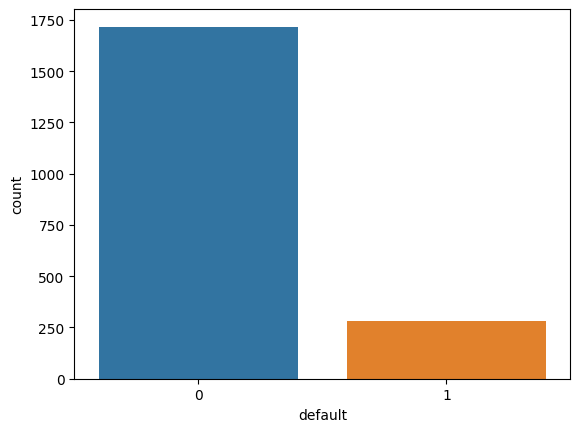

In [4]:
# count of target variable - to check if there is class imbalance.
sns.countplot(x='default',data=data)

We observe that the number of `yes` `(1)` class is significantly low compared to the `no` `(0)` class. We shall first observe how this affects the performance of our model. Once we obtain the evaluation metrics we shall determine if there is a need to implement oversampling techniques.

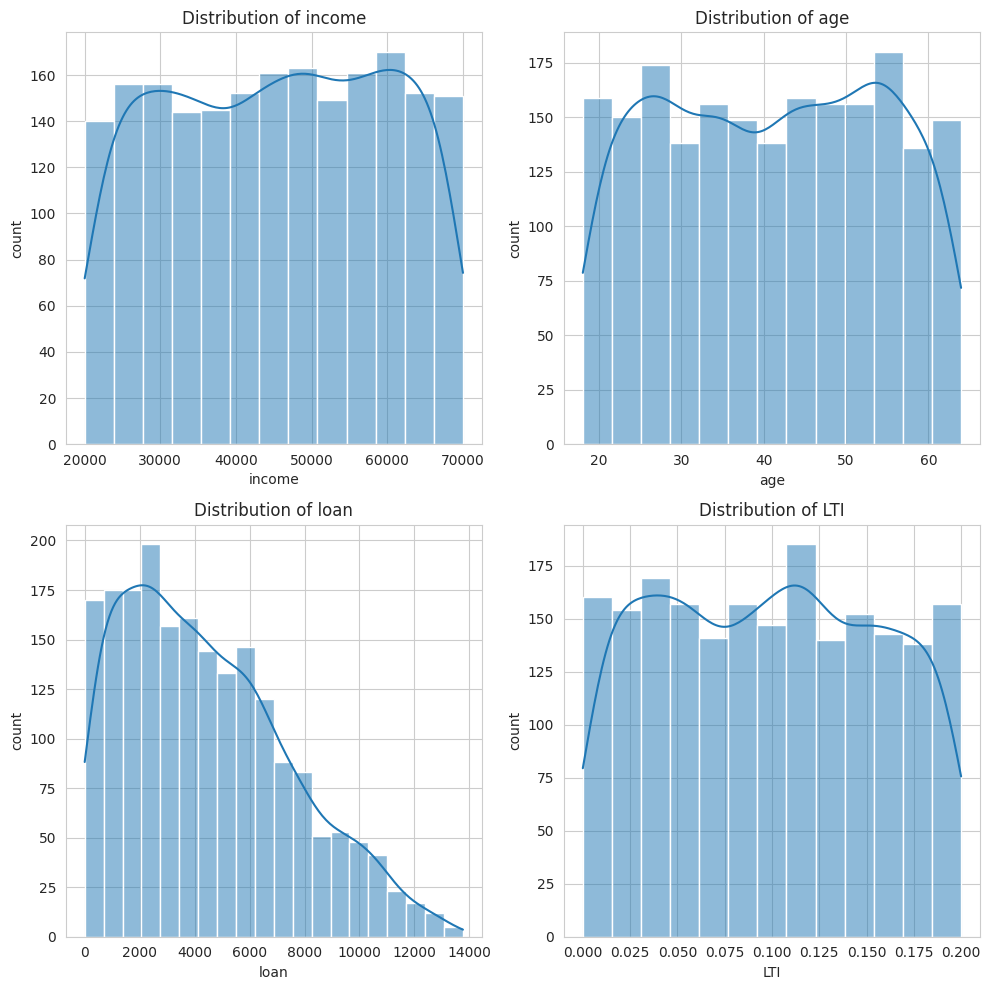

In [13]:
# obtaining histplot (distribution) of various numerical variables
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
axes=axes.flatten()
cols=['income', 'age', 'loan', 'LTI']
sns.set_style('whitegrid')
for i,col in enumerate(cols):
  sns.histplot(data[col],kde=True,ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('count')
plt.tight_layout()
plt.show()

We observe that all the variables except for loan, has uniform distribution (with slight variations).
The distribution of loan is skewed and has a heavier left tail. The graph is positively skewed.

<Axes: >

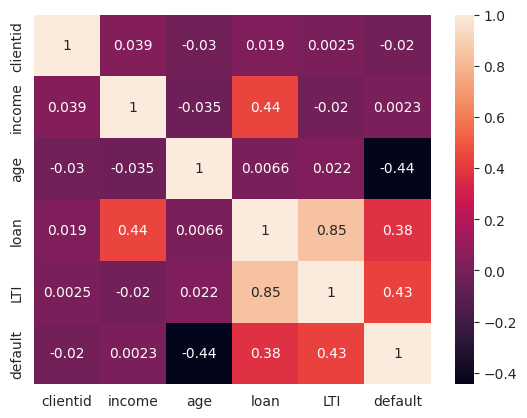

In [14]:
# examining correlation
corr=data.corr()
sns.heatmap(corr,annot=True)

In [15]:
# selecting features and target
X=data.drop(columns=['clientid','default'])
y=data['default']
# splitting into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)
# building the model - multiple logistic regression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [18]:
# accuracy of the model
accuracy=accuracy_score(y_test,y_pred)
# confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
print('Accuracy:',accuracy)
print('Confusion matrix: ')
conf_mat

Accuracy: 0.9183333333333333
Confusion matrix: 


array([[501,  11],
       [ 38,  50]])

In [24]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       512
           1       0.82      0.57      0.67        88

    accuracy                           0.92       600
   macro avg       0.87      0.77      0.81       600
weighted avg       0.91      0.92      0.91       600



- The model is 92% accurate.
- Interpreting the confusion matrix:
  - 501 correctly classified as 0
  - 50 correctly classified as 1
  - 11 are actually 0 but predicted as 1
  - 34 are actually 1 but predicted as 0
- The recall for class 1 is comparatively lower. This is due to class imbalance.

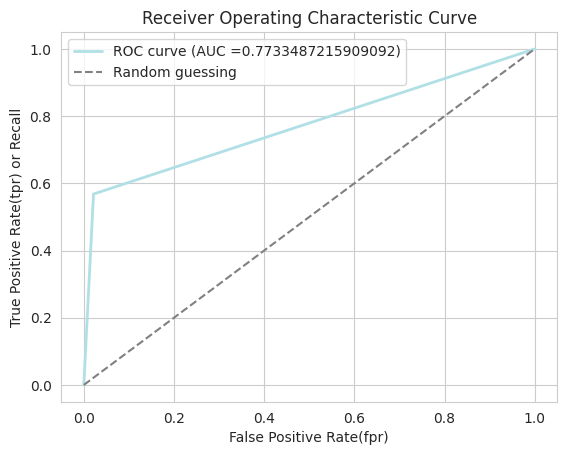

In [20]:
# Calculate ROC AUC score and Plotting ROC curve
sns.set_style('whitegrid')
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
# plotting the curve
plt.plot(fpr,tpr,color='powderblue',lw=2,label=f'ROC curve (AUC ={roc_auc})')
plt.plot([0,1],[0,1],color='gray',ls='--',label='Random guessing')
plt.xlabel('False Positive Rate(fpr)')
plt.ylabel('True Positive Rate(tpr) or Recall')
plt.title("Receiver Operating Characteristic Curve")
plt.legend()
plt.show()

A ROC AUC score of 0.773 is a moderately good result, and it suggests that the model has a reasonable ability to distinguish between the positive and negative classes. The ROC AUC score ranges from 0 to 1, with 0.5 indicating random chance and 1 indicating perfect discrimination.

Here's a general interpretation:

- 0.5: Random guessing.
- 0.7-0.8: Acceptable discrimination ability.
- 0.8-0.9: Good discrimination ability.
- 0.9-1.0: Excellent discrimination ability.
Given  ROC AUC score of 0.773, the model falls into the "acceptable discrimination ability" range. This means it is better than random chance but may not be highly accurate in distinguishing between the positive and negative classes.

In [25]:
# Observing the impact of oversampling - solving the imbalance issue
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=1234)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)
new_model=model.fit(x_train_resampled,y_train_resampled)
y_predicted=new_model.predict(x_test)

Text(0.5, 1.0, 'Countplot After Oversampling')

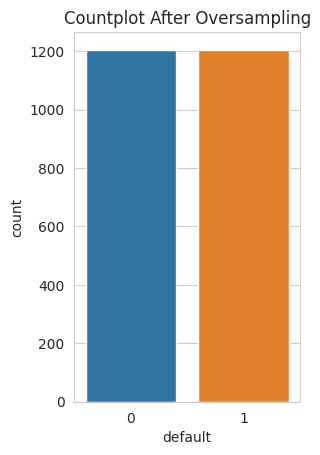

In [28]:
# Convert the oversampled training data back to a DataFrame
oversampled_data = pd.DataFrame(x_train_resampled, columns=X.columns)
oversampled_data['default'] = y_train_resampled
# Countplot after oversampling
plt.subplot(1, 2, 2)
sns.countplot(x='default', data=oversampled_data)
plt.title('Countplot After Oversampling')

In [30]:
# accuracy of the new model
accuracy=accuracy_score(y_test,y_predicted)
# confusion matrix
conf_mat=confusion_matrix(y_test,y_predicted)
print('Accuracy:',accuracy)
print('Confusion matrix: ')
conf_mat

Accuracy: 0.8966666666666666
Confusion matrix: 


array([[466,  46],
       [ 16,  72]])

In [31]:
report=classification_report(y_test,y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       512
           1       0.61      0.82      0.70        88

    accuracy                           0.90       600
   macro avg       0.79      0.86      0.82       600
weighted avg       0.91      0.90      0.90       600



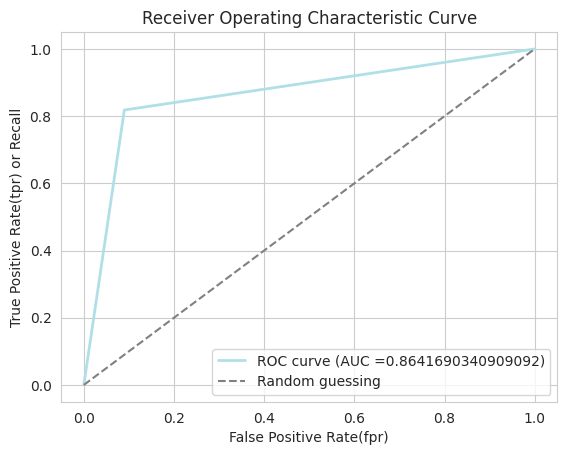

In [32]:
# Calculate ROC AUC score and Plotting ROC curve
sns.set_style('whitegrid')
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)
roc_auc=roc_auc_score(y_test,y_predicted)
# plotting the curve
plt.plot(fpr,tpr,color='powderblue',lw=2,label=f'ROC curve (AUC ={roc_auc})')
plt.plot([0,1],[0,1],color='gray',ls='--',label='Random guessing')
plt.xlabel('False Positive Rate(fpr)')
plt.ylabel('True Positive Rate(tpr) or Recall')
plt.title("Receiver Operating Characteristic Curve")
plt.legend()
plt.show()

We observe that the perfomance of the model has improved. The accuracy score of the model seems to have reduced but when we observe the recall values and the area under the curve we can tell that the model has improved in perfomance.